In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [60]:
def generate_random_poly_points(num_points = 50):
    '''generates a random polynomial'''
    func_ = [np.sin, np.cos, np.exp, np.log]
    x = np.random.rand(num_points,1)
    y = 0

    y =   np.random.choice(func_)(2*x) \
          + np.random.choice(func_)(7*x)+ 0.3 * np.random.rand(num_points,1) + np.random.choice(func_)(x)\
          + np.random.choice(func_)(3*x) + np.random.choice(func_)(x) + 0.34 * (x**3)+ np.random.choice(func_)(x)

    return x,y

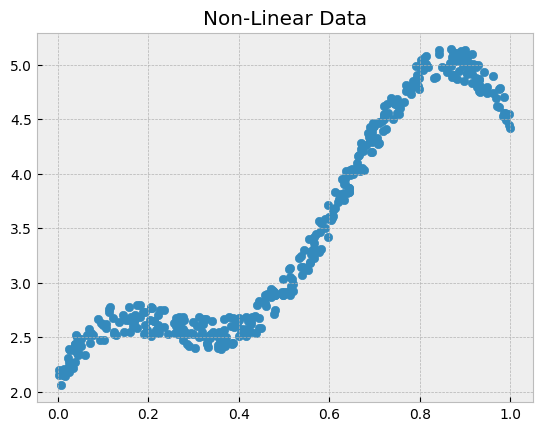

In [62]:
X,y = generate_random_poly_points(400)
plt.style.use('bmh')
plt.scatter(X,y)
plt.title("Non-Linear Data")
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,y)
preds= model.predict(X)

#=================================


In [64]:
def show(X,y,model):
    plt.scatter(X[:,0],y, label = "samples")
    preds = model.predict(X)
    out_ = pd.DataFrame({'feature':X[:,0].ravel(),'preds':model.predict(X).ravel()}).sort_values(by = "feature")
    plt.plot(out_["feature"],out_["preds"], color = 'r',label = "prediction")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    # plt.show()

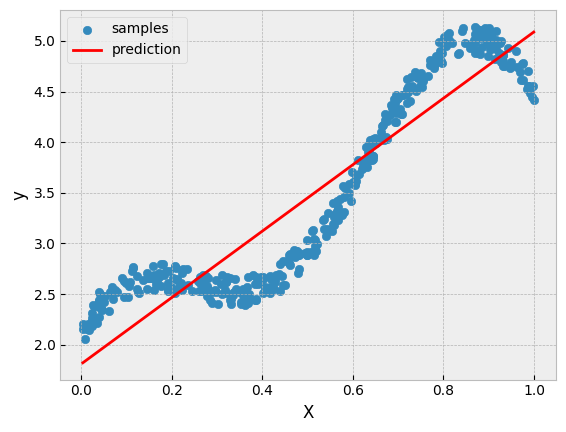

In [66]:
show(X,y,model)

In [67]:
## addinf new features

X_deg2 = np.hstack([X,X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2,y)
preds_2 = model_deg2.predict(X_deg2)


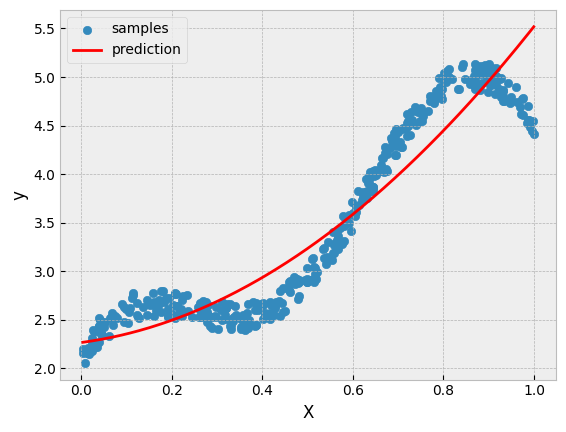

In [68]:
show(X_deg2,y, model_deg2)

In [69]:

X_deg3 = np.hstack([X,X**2,X**3])
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3,y)
preds_3 = model_deg3.predict(X_deg3)

0.9397184531029762


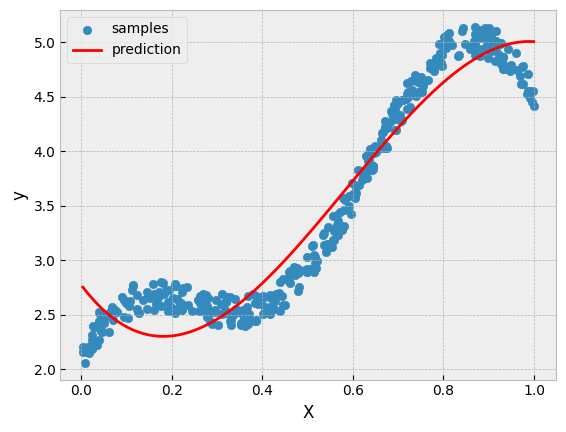

In [70]:
print(model_deg3.score(X_deg3,y))
show(X_deg3,y,model_deg3)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pp_reg = Pipeline([('ploy', PolynomialFeatures(3)),
                   ('reg_model',LinearRegression())])

pp_reg.fit(X,y)

Pipeline(steps=[('ploy', PolynomialFeatures(degree=3)),
                ('reg_model', LinearRegression())])

0.9397184531029762


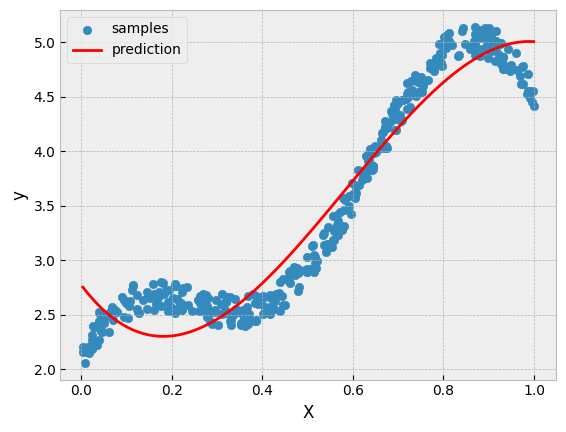

In [72]:
print(pp_reg.score(X,y))
show(X,y,pp_reg)

In [73]:
import os
import shutil
import imageio
def poly_curves(X,y):
    scores = []
    filenames = []
    tmpdirname = 'poly_reg_plots'
    for degree in range(0,13):
        pp_reg = Pipeline([('ploy', PolynomialFeatures(degree)),
                           ('reg_model',LinearRegression())])
        pp_reg.fit(X,y)
        scores.append(pp_reg.score(X,y))
        plt.title(f'Features with degree: {degree} | R2: {round(pp_reg.score(X,y),2)}')
        show(X,y,pp_reg)
        # Save the current plot as an image file
        os.makedirs(tmpdirname, exist_ok=True)
        filename = os.path.join(tmpdirname, f'plot_degree_{degree}.png')
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
    # Create a GIF from the saved images
    with imageio.get_writer('polynomial_regression.gif', mode='I', duration=10) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    shutil.rmtree(tmpdirname)
    print("GIF created successfully!")


In [74]:
poly_curves(X,y)

GIF created successfully!
